In [2]:
# 1. Import Libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, model_selection, linear_model
from sklearn.metrics import mean_squared_error, accuracy_score

# 2. Load Datasets

In [5]:
diabetes = datasets.load_diabetes()
# diabetes

In [8]:
diabetes_target = diabetes.target
diabetes_train = diabetes.data

In [9]:
diabetes_train

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

# 3. Create binary labels

In [11]:
mean_measurement = np.mean(diabetes_target)
print(mean_measurement)

152.13348416289594


In [14]:
diabetes_target_zero_one = np.array(diabetes_target > mean_measurement, dtype=int)
diabetes_target_zero_one

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,

# 4. Feature Selection

In [18]:
diabetes_x = diabetes_train[:,-2:-1]
diabetes_x

array([[ 0.01990842],
       [-0.06832974],
       [ 0.00286377],
       [ 0.02269202],
       [-0.03199144],
       [-0.04118039],
       [-0.06291295],
       [-0.03581673],
       [-0.01495648],
       [ 0.06773633],
       [-0.06291295],
       [-0.09643322],
       [-0.03075121],
       [ 0.03839325],
       [-0.03199144],
       [ 0.03605579],
       [ 0.05228   ],
       [ 0.02736771],
       [-0.01811827],
       [-0.00894402],
       [-0.01190068],
       [-0.07212845],
       [-0.0611766 ],
       [ 0.13359898],
       [-0.02595242],
       [ 0.01919903],
       [-0.0425721 ],
       [-0.01599827],
       [-0.00060925],
       [ 0.0594238 ],
       [-0.02712865],
       [-0.03712835],
       [ 0.00027149],
       [-0.01811827],
       [-0.0594727 ],
       [ 0.02131085],
       [ 0.054724  ],
       [ 0.01703713],
       [ 0.07142403],
       [ 0.01919903],
       [ 0.01255315],
       [-0.04986847],
       [-0.00991896],
       [-0.0425721 ],
       [ 0.03243323],
       [-0

In [19]:
diabetes_y = diabetes_target_zero_one
diabetes_y

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,

# 5. Split into Train & Test data

In [22]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(diabetes_x, diabetes_y,test_size=0.3,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(309, 1)
(133, 1)
(309,)
(133,)


# 6. Create Model object

In [23]:
model = linear_model.LogisticRegression(n_jobs=-1)
model

LogisticRegression(n_jobs=-1)

# 7. Train Model object

In [24]:
model.fit(x_train, y_train)

LogisticRegression(n_jobs=-1)

# 8. Test Model object

In [25]:
model.predict(x_test)

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [27]:
pred_test = model.predict_proba(x_test)

In [32]:
ac_score = accuracy_score(model.predict(x_test), y_test)
print("Accuracy: {0: 5f}".format(ac_score))

Accuracy:  0.571429


# 9. Visualization

In [34]:
from sklearn.metrics import roc_curve, auc

In [35]:
fpr, tpr, _ = roc_curve(y_true=y_test, y_score=pred_test[:,1])
roc_auc = auc(fpr, tpr)

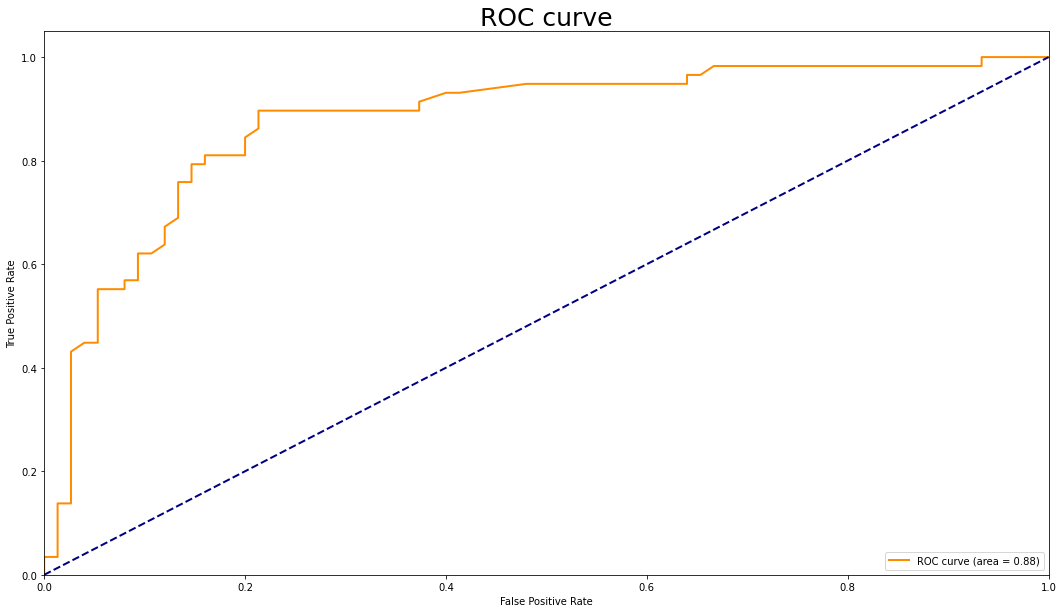

In [45]:
plt.figure(figsize=(18, 10))

plt.plot(fpr, tpr, color='darkorange', lw=2, label="ROC curve (area = %.2f)"%roc_auc)
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title("ROC curve", size=25)

plt.show()